# ベルンシュタイン・ヴァジラニ アルゴリズム

本節では、まず、ベルンシュタイン・ヴァジラニ問題と、それを解くための古典的アルゴリズムと量子アルゴリズムを紹介します。次に、Qiskitを用いて量子アルゴリズムを実装し、シミュレーターと実デバイス上でそれぞれ実行します。

## 目次

1. [ベルンシュタイン・ヴァジラニ アルゴリズム](#algorithm)   
   1.1 [ベルンシュタイン・ヴァジラニ問題](#bvproblem)    
   1.2 [古典的な解法](#classical)   
   1.3 [量子的な解法](#quantum) 
2. [具体例](#example)
3. [Qiskitを用いた実装](#implementation)     
   3.1 [シミュレーション](#simulation)     
   3.2 [実デバイス](#device)     
4. [演習](#problems)
5. [参考文献](#references)

## 1. ベルンシュタイン・ヴァジラニ アルゴリズム<a id='algorithm'></a>

参考文献[1]で最初に紹介されたベルンシュタイン・ヴァジラニ アルゴリズムは、前節で取り上げたドイチ・ジョザ アルゴリズムの拡張として見ることができます。このアルゴリズムは、ドイチ・ジョザ問題と比較して、より複雑な問題の計算ツールとして量子コンピューターを使用することに利点があることを示しました。

### 1.1 ベルンシュタイン・ヴァジラニ問題 <a id='bvproblem'> </a>

我々は再び、以下のような隠されたブール関数 $f$ を与えられます。この関数は、ビットの文字列を入力として受け取り、$0$ か $1$ のどちらかを返します。

$f(\{x_0,x_1,x_2,...\}) \rightarrow$ 0または1 ( $x_n$ =0 または 1のとき)

ドイチ・ジョザ問題のように、均等(balanced)または一定(constant)な関数のどちらかになるのではなく、この関数は入力$x$と文字列$s$のビットごとの内積を返すことが保証されています。つまり、入力$x$について$f(x) = s \cdot x \, \text{(mod 2)}$を満たす関数です。我々は、そのときの$s$を見つけることを期待されています。リバーシブルな古典回路としてのベルンシュタイン・ヴァジラニのオラクルは以下のようにかけます。
    
![classical reversible circuit](images/bv2.svg)



### 1.2 古典的な解法 <a id='classical-solution'> </a>

古典的には、オラクルは入力 $x$ に対して
$$f_s(x) = s \cdot x \mod 2$$ 
を返します。

隠れたビット文字列 $s$ の各ビットは以下の入力のシーケンスをオラクルに問合せすることで洗い出されます。

|Input(x)|
|:-----:|
|100...0|
|010...0|
|001...0|
|000...1|

例えば、`x = 1000...0` により $s$ の一番小さい桁のビットをみつけることができます。`x = 0100...0` により $s$ の二番目に小さい桁のビットをみつけることができます。つまり、関数 $f_s(x)$を $n$回呼び出す必要があります。

### 1.3 量子的な解法 <a id='quantum-solution'> </a>

量子コンピューターを使うと、関数$f(x)$を1回呼び出すだけで、この問題を100%の確信度で解くことができます。隠れたビット文字列を見つける量子ベルンシュタイン・ヴァジラニ アルゴリズムは非常にシンプルです。

1. 入力量子ビットを$|0\rangle^{\otimes n}$ に、出力量子ビットを$|-\rangle$状態に初期化
2. アダマールゲートを入力量子ビットに適用
3. オラクルをクエリ
4. 入力レジスタにアダマールゲートを適用
5. 測定

![Bernstein-Vazirani quantum circuit](images/bv1.svg)

Tアルゴリズムを説明するために、各量子ビットにアダマールゲートを適用したときに何が起きるのかをみてみましょう。$n$ 量子ビットの量子状態 $|a \rangle$ にアダマールゲートを適用すると以下の変換をみることができます。

$$
|a\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle.
$$



<details>
    <summary>式を説明する (クリックして開く)</summary>
アダマールは1つの量子ビットに対して次のような変換を行うことを思い出しましょう。

$$
H|0\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$ $$
H|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

総和記号を使うことで、以下のように書き換えられます。

$$
H|a\rangle = \sum_{x\in \{0,1\}} (-1)^{a\cdot x}|x\rangle.
$$

2つの量子ビットに対して、それぞれにアダマールを適用すると、次のような変換が行われます。

$$
H^{\otimes 2}|00\rangle = |00\rangle + |01\rangle + |10\rangle + |11\rangle
$$ $$
H^{\otimes 2}|01\rangle = |00\rangle - |01\rangle + |10\rangle - |11\rangle
$$ $$
H^{\otimes 2}|10\rangle = |00\rangle + |01\rangle - |10\rangle - |11\rangle
$$ $$
H^{\otimes 2}|11\rangle = |00\rangle - |01\rangle - |10\rangle + |11\rangle
$$

総和記号で、以下のようにまとめて表現することができます。

$$
H^{\otimes 2}|a\rangle = \sum_{x\in \{0,1\}^2} (-1)^{a\cdot x}|x\rangle
$$

最初の式にたどり着く方法がこれで理解できるかと思います。
</details>

特に、 $|00...0\rangle$ に初期化された量子レジスタから始めて、 $n$ 個のアダマールゲートをかけると、おなじみの量子重ね合わせができます。

$$
|00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle
$$

この場合、$a$=0により$(-1)^{a\cdot x}$ =1となることから、位相$(-1)^{a\cdot x}$ が消えます。 

さて、古典のオラクル $f_s$ は、$s \cdot x\mod 2 = 1$を満たす任意の入力 $x$ に対して $1$ を、それ以外のときは $0$ を返します。ドイチ・ジョザでも用いた $|{-}\rangle$に対する位相キックバックのテクニックを利用することで、以下の変換を得られます。

$$
|x \rangle \xrightarrow{f_s} (-1)^{s\cdot x} |x \rangle 
$$

隠れた文字列を明らかにするアルゴリズムは、 $|0\rangle$ のアダマール変換から得られた量子的な重ね合わせで、量子オラクル$f_s$を問い合わせることで、自然に次のようになります。

$$
|00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle \xrightarrow{f_a} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle
$$

$n$ 個のアダマールゲートの逆行列は、再び $n$ 個のアダマールゲートなので、次のようにして $a$ を求めることができます。

$$
\frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle \xrightarrow{H^{\otimes n}} |a\rangle
$$

## 2. 具体例  <a id='example'></a>

$n=2$ の量子ビットと秘密の文字列 $s=11$ で具体的な例を見てみましょう。ここでは、参考文献 [2] の定式に従って、1つのレジスタだけを使ってベルンシュタイン・ヴァジラニ量子オラクルのための回路を生成していることに注意してください。 

<ol>
    <li> 2つの量子ビットのレジスタは0に初期化されています。
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle$$

 
   </li>

   <li> 両方の量子ビットにアダマールゲートを適用します。
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) $$

 
   </li>

   <li> 文字列 $s=11$ に対して、量子オラクルは以下の演算を行います。
$$
|x \rangle \xrightarrow{f_s} (-1)^{x\cdot 11} |x \rangle. 
$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( (-1)^{00\cdot 11}|00\rangle + (-1)^{01\cdot 11}|01\rangle + (-1)^{10\cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle \right)$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)$$

 
   </li>

   <li> 両方の量子ビットにアダマールゲートを適用します。
    

$$\lvert \psi_3 \rangle = \lvert 1 1 \rangle$$

 
   </li>

   <li> 秘密の文字列 $s=11$ を見つけるために測定します。
   </li>


</ol>

以下のウィジェット `bv_widget` を活用してください。ボタンを押してそれぞれのステップを適用し、アルゴリズムを実行してみてください。最初の2つの位置引数によって、入力量子ビットの数と秘密の文字列の値を変更することができます。

In [1]:
from qiskit_textbook.widgets import bv_widget
bv_widget(2, "11")

HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01*\x00\x00\x00\xcc\x08\x06\x00\x00\x00\xc4P\xee\x0…

## 3. Qiskitを用いた実装  <a id='implementation'></a>

ここで、$s=011$の3量子ビットの関数について、Qiskitでのベルンシュタイン・ヴァジラニ アルゴリズムの実装を見ていきましょう。

In [2]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

まず、実験で使用する量子ビット数と、アルゴリズムが求める隠れたビット文字列 $s$ を設定します。隠れたビット文字列 $s$ は、量子オラクルの回路を決定します。

In [3]:
n = 3 # number of qubits used to represent s
s = '011'   # the hidden binary string

その後、Qiskitを使用してベルンシュタイン・ヴァジラニ アルゴリズムをプログラムします。

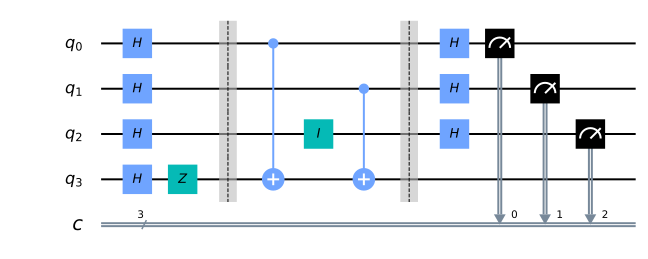

In [4]:
# We need a circuit with n qubits, plus one ancilla qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put ancilla in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

### 3a. シミュレーターでの実験   <a id='simulation'></a>

上記の回路をシミュレーター上で実行できます。

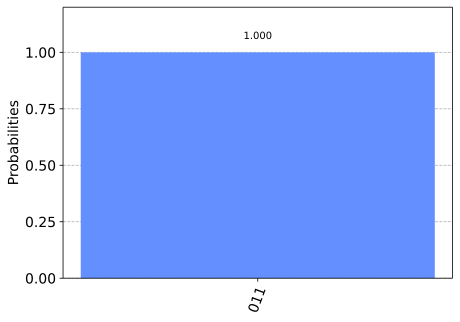

In [5]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(bv_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

測定の結果は、隠れた文字列 `011` であることがわかります。

### 3b. 実デバイスでの実験 <a id='device'></a>

以下のように実デバイス上で回路を動作させることができます。

In [6]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_london


In [7]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_bv_circuit = transpile(bv_circuit, backend)
job = backend.run(transpiled_bv_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job has successfully run


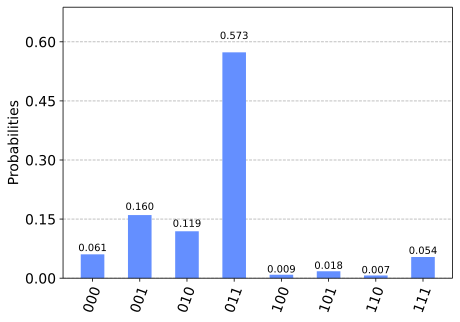

In [8]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

見ての通り、ほとんどの結果は`011`です。他の結果は量子計算の誤差によるものです。

## 4. 演習 <a id='problems'></a>

1. 以下のウィジットを使用してベルンシュタイン・ヴァジラニ アルゴリズムが異なるオラクルで動く様子を確認してください。

In [9]:
from qiskit_textbook.widgets import bv_widget
bv_widget(3, "011", hide_oracle=False)

HTMLMath(value='$$ |000\\rangle = |000\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01*\x00\x00\x01\x08\x08\x06\x00\x00\x00\xe8^\xb9\x1…

2. 上記のベルンシュタイン・ヴァジラニの[実装](#implementation)は、秘密のビット文字列$s = 011$の場合のものです。秘密の文字列 $s = 1011$ の場合を実装してください。結果は期待通りでしたか？説明してみてください。

3. 上記のベルンシュタイン・ヴァジラニの[実装](#implementation)は、秘密のビット文字列$s = 011$の場合のものです。秘密の文字列 $s = 1110110101$ の場合を実装してください。結果は期待通りでしたか？説明してみてください。

## 5. 参考文献 <a id='references'></a>
1. Ethan Bernstein and Umesh Vazirani (1997) "Quantum Complexity Theory" SIAM Journal on Computing, Vol. 26, No. 5: 1411-1473, [doi:10.1137/S0097539796300921](https://doi.org/10.1137/S0097539796300921).
2. Jiangfeng Du, Mingjun Shi, Jihui Wu, Xianyi Zhou, Yangmei Fan, BangJiao Ye, Rongdian Han (2001) "Implementation of a quantum algorithm to solve the Bernstein-Vazirani parity problem without entanglement on an ensemble quantum computer", Phys. Rev. A 64, 042306, [10.1103/PhysRevA.64.042306](https://doi.org/10.1103/PhysRevA.64.042306), [arXiv:quant-ph/0012114](https://arxiv.org/abs/quant-ph/0012114). 

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.19.6'}